In [4]:
! pip install xgboost

  Using cached https://files.pythonhosted.org/packages/2e/bd/ad3a963b630fa3ee72d1a672fd207263fa0a18113688273afe8298293535/xgboost-0.82.tar.gz


DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
ERROR: Files/directories not found in c:\users\nate\appdata\local\temp\pip-install-hqa8mh\xgboost\pip-egg-info
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Average RMSE across all splits: 2004.0813604098882


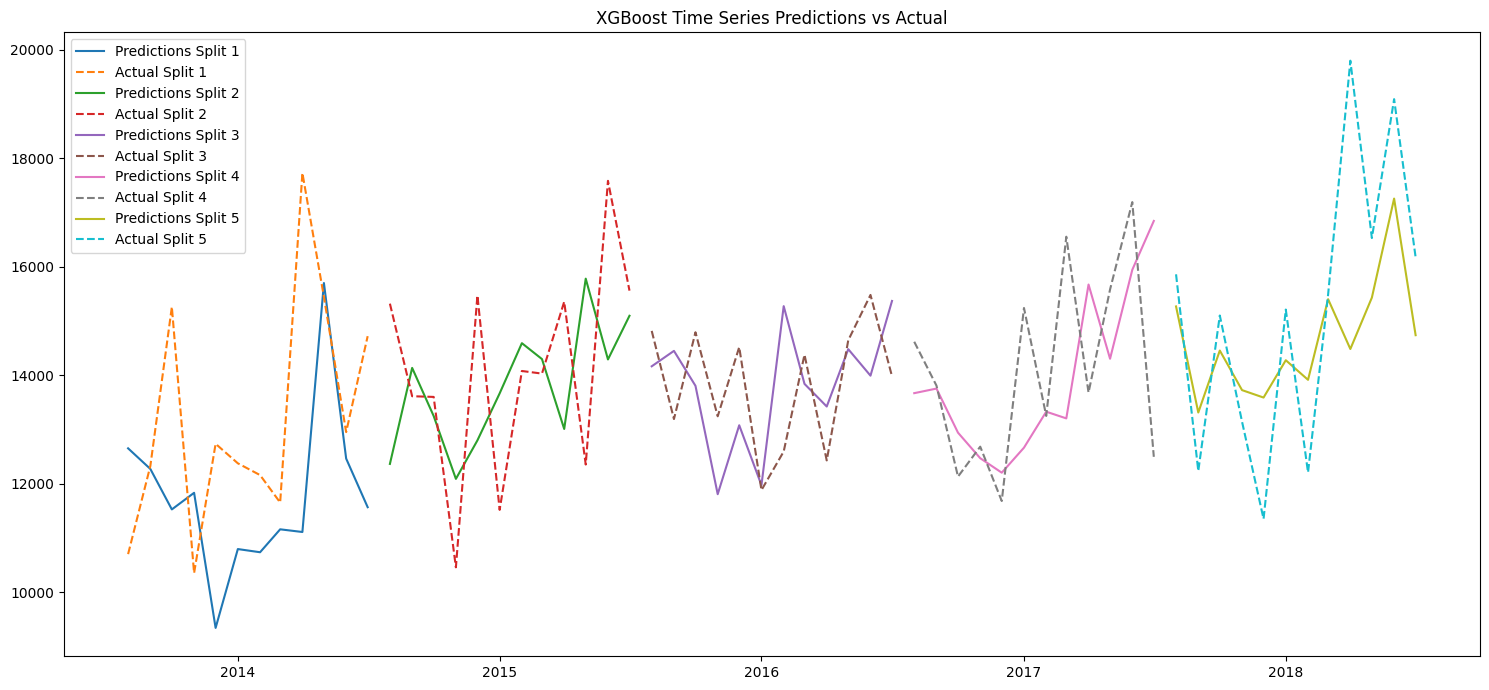

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv("master_data_setV0.csv")

#The code converts the "Date" column of the df table into a proper date format and then uses 
#it as the main label for each row (like page numbers in a book).
# df['Date'] = pd.to_datetime(df['Date']).dt.to_period('M')



# columns = ["State","Division","Date","Value","Lag_Month_1","Lag_Month_2","Lag_Month_3","Lag_Month_4",
#            "Lag_Month_5","Lag_Month_6","Lag_Month_7","Lag_Month_8","Lag_Month_9","Lag_Month_10","Lag_Month_11",
#            "Lag_Month_12","Lag_Month_13","Lag_Month_14","Lag_Month_15","Lag_Month_16","Lag_Month_17",
#            "Lag_Month_18","Lag_Month_19","Lag_Month_20","Lag_Month_21","Lag_Month_22","Lag_Month_23",
#            "Lag_Month_24","Lag_Year_1","Lag_Year_2","Lag_Year_3","Lag_Year_4","Lag_Year_5","Lag_Year_6",
#            "Lag_Year_7","Lag_Year_8","Lag_Year_9","Lag_Year_10","Lag_Year_11","Lag_Year_12","Lag_Year_13",
#            "Lag_Year_14","Lag_Year_15"]



columns = ["State","Division","Date","Value","Lag_Month_1","Lag_Month_2","Lag_Month_3","Lag_Month_4",
           "Lag_Month_5","Lag_Month_6","Lag_Month_7","Lag_Month_8","Lag_Month_9","Lag_Month_10","Lag_Month_11",
           "Lag_Month_12","Lag_Month_13","Lag_Month_14","Lag_Month_15","Lag_Month_16","Lag_Month_17",
           "Lag_Month_18","Lag_Month_19","Lag_Month_20","Lag_Month_21","Lag_Month_22","Lag_Month_23",
           "Lag_Month_24","Lag_Year_1","Lag_Year_2","Lag_Year_3","Lag_Year_4","Lag_Year_5","Lag_Year_6",
           "Lag_Year_7","Lag_Year_8","Lag_Year_9","Lag_Year_10","Lag_Year_11","Lag_Year_12","Lag_Year_13",
           "Lag_Year_14","Lag_Year_15"]

df = df[columns]

df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date", inplace=True)


# The code filters the df table to keep only the rows where the "State" column is labeled as "Florida".

df = df[df['State'] == 'Texas']

# The code removes the "State" and "Division" columns from the df table and then displays the top rows 
#of the updated table to check the changes.

df = df.drop(columns=['State', 'Division'])
#print(df.head)

#The code sets up three numbers: the starting size of the training data by subtracting 6 years (72 months) 
#from the total number of rows in the table, the size of each validation set as 1 year (12 months), and the 
#number of times the validation process will be done as 5.
# Define the initial train size and validation size

initial_train_size = len(df) - 10*12  # use all data minus 6 years (5 validations + 1 test)
validation_size = 12*1  # 1 year
n_splits = 5

# For plotting predictions vs actual.The code prepares a blank drawing space for a graph that's 15 units wide 
# and 7 units tall.

plt.figure(figsize=(15, 7))

rmse_values = []

for split in range(n_splits):
    # Define the train and validation sets for this split
    train = df.iloc[:initial_train_size + split * validation_size]
    validation = df.iloc[initial_train_size + split * validation_size:initial_train_size + (split+1) * validation_size]
    
    # Separate features and Value
    X_train, y_train = train.drop('Value', axis=1), train['Value']
    X_val, y_val = validation.drop('Value', axis=1), validation['Value']
    
    # Train the XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror')  # You can tune hyperparameters here
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_val)
    
    # Plot predictions vs actual for this split
    plt.plot(validation.index, y_pred, label=f'Predictions Split {split+1}')
    plt.plot(validation.index, y_val, label=f'Actual Split {split+1}', linestyle='--')
    

    # Calculate RMSE for this split and append to the list
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_values.append(rmse)

# Calculate and print the average RMSE across all splits
average_rmse = np.mean(rmse_values)
print(f"Average RMSE across all splits: {average_rmse}")


# Customize the plot
plt.title('XGBoost Time Series Predictions vs Actual')
plt.legend()
plt.tight_layout()
plt.show()



# # For plotting entire training and validation up to that point
# for split in range(n_splits):
#     plt.figure(figsize=(15, 7))
    
#     # Entire data up to the end of this validation set
#     combined = df.iloc[:initial_train_size + (split+1) * validation_size]
    
#     # Plot training data
#     plt.plot(train.index, train['Value'], color='blue', label='Training Data')
    
#     # Plot validation data
#     plt.plot(validation.index, y_val, color='red', label='Validation Data')
#     plt.plot(validation.index, y_pred, color='green', linestyle='--', label='Predictions')
    
#     # Customize the plot
#     plt.title(f'Training and Validation Data up to Split {split+1}')
#     plt.legend()
#     plt.tight_layout()
#     plt.show()
